Installing and importing Python libraries that will be needed. Imported BeautifulSoup, pandas, and requests

In [2]:

try:
    from bs4 import BeautifulSoup
    import pandas
    print ("BeautifulSoup and Pandas are already installed and imported")
except:
    import sys
    !conda install --yes --prefix {sys.prefix} bs4
    !conda install --yes --prefix {sys.prefix} pandas
    from bs4 import BeautifulSoup
    import pandas
    print ("BeautifulSoup and Pandas were not found. Installed them and imported")

import requests

BeautifulSoup and Pandas are already installed and imported


Called a command that would open the website page and used BeautifulSoup API to load and parse the data from the website.

In [3]:
opened_webpage = requests.get("https://simple.wikipedia.org/wiki/List_of_the_busiest_airports_in_the_United_States")
print ("Webpage opened successfully...")

bs = BeautifulSoup(opened_webpage.content, "html.parser")
print ("Webpage loaded and parsed successfully...")

Webpage opened successfully...
Webpage loaded and parsed successfully...


Using BeautifulSoup to EXTRACT the table from the HTML code. For wiki pages, the table is formatted as wikitable sortable.

In [4]:
table = bs.find("table",{"class":"wikitable sortable"})
table

<table class="wikitable sortable" style="font-size: 85%">
<tbody><tr>
<th>Rank<br/>(2010)</th>
<th>Airport</th>
<th>IATA<br/>Code</th>
<th>City Served</th>
<th>State</th>
<th>2010<sup class="reference" id="cite_ref-CY10_1-0"><a href="#cite_note-CY10-1">[1]</a></sup></th>
<th>2009<sup class="reference" id="cite_ref-CY09_2-0"><a href="#cite_note-CY09-2">[2]</a></sup></th>
<th>2008<sup class="reference" id="cite_ref-CY09_2-1"><a href="#cite_note-CY09-2">[2]</a></sup></th>
<th>2007<sup class="reference" id="cite_ref-3"><a href="#cite_note-3">[3]</a></sup></th>
<th>2006<sup class="reference" id="cite_ref-4"><a href="#cite_note-4">[4]</a></sup></th>
<th>2005<sup class="reference" id="cite_ref-5"><a href="#cite_note-5">[5]</a></sup>
</th></tr>
<tr>
<td>1
</td>
<td><a class="mw-redirect" href="/wiki/Hartsfield_Jackson_Atlanta_International_Airport" title="Hartsfield Jackson Atlanta International Airport">Hartsfield Jackson Atlanta International Airport</a>
</td>
<td>ATL
</td>
<td>Atlanta
</td>

Created lists for storing data in each of the tables columns. Then took the data from each of the rows and cells of the table and transformed them into the row_data list.

In [5]:
ranks = []
IATA = []
cities = []
states = []
year_2010 = []
year_2009 = []
year_2008 = []
year_2007 = []
year_2006 = []
year_2005 = []

for row in table.find_all("tr"):
    row_data = []
    for cell in row.find_all("td"):
        cell_text = cell.get_text(strip = True)
        row_data.append(cell_text)


    if row_data:
            ranks.append(row_data[0])
            IATA.append(row_data[2])
            cities.append(row_data[3])
            states.append(row_data[4])
            year_2010.append(row_data[5])
            year_2009.append(row_data[6])
            year_2008.append(row_data[7])
            year_2007.append(row_data[8])
            year_2006.append(row_data[9])
            year_2005.append(row_data[10])


Created a dictionary that takes the lists defined above and names each of the columns that will be present in a printed dataframe.

In [6]:
final_data = {
    "rank" : ranks,
    "IATA Code" : IATA,
    "city" : cities,
    "state" : states,
    "2010" : year_2010,
    "2009" : year_2009,
    "2008" : year_2008,
    "2007" : year_2007,
    "2006" : year_2006,
    "2005" : year_2005,
}

Converting final_data variable into a data frame

In [7]:
final_data = pandas.DataFrame(final_data)

final_data.set_index("city", inplace = True)
final_data

,rank,IATA Code,state,2010,2009,2008,2007,2006,2005
city,,,,,,,,,
Atlanta,1,ATL,GA,"43,130,585","42,280,868","43,236,665","43,236,665","41,352,038","42,402,653"
Chicago,2,ORD,IL,"32,171,831","31,135,732","33,683,991","36,521,585","36,825,097","36,720,005"
Los Angeles,3,LAX,CA,"28,857,755","27,439,897","28,861,477","30,113,985","29,357,327","29,372,272"
Dallas/Fort Worth,4,DFW,TX,"27,100,656","26,663,984","27,219,985","28,482,417","28,627,749","28,079,147"
Denver,5,DEN,CO,"25,241,962","24,013,669","24,287,939","20,796,173","20,591,909","20,315,544"
New York,6,JFK,NY,"22,934,047","22,710,272","23,620,948","23,401,351","21,071,501","20,260,359"
Houston,7,IAH,TX,"19,528,631","19,290,239","20,030,898","24,117,623","22,822,111","20,799,886"
San Francisco,8,SFO,CA,"19,359,003","18,467,908","18,135,827","17,280,328","16,236,592","16,070,133"
Las Vegas,9,LAS,NV,"18,996,738","19,445,952","21,024,443","22,537,950","22,028,521","21,402,676"


TRANSFORMING the raw data. Removing uneccessary strings and transforming into integer data types

In [8]:
def clearn_string_and_convert(s):
  if isinstance(s, float):
        return int(s)
  s = s.replace(",","")
  converted = int(float(s))
  return converted

final_data["2010"] = final_data["2010"].apply(clearn_string_and_convert)
final_data["2009"] = final_data["2009"].apply(clearn_string_and_convert)
final_data["2008"] = final_data["2008"].apply(clearn_string_and_convert)
final_data["2007"] = final_data["2007"].apply(clearn_string_and_convert)
final_data["2006"] = final_data["2006"].apply(clearn_string_and_convert)
final_data["2005"] = final_data["2005"].apply(clearn_string_and_convert)

final_data

,rank,IATA Code,state,2010,2009,2008,2007,2006,2005
city,,,,,,,,,
Atlanta,1,ATL,GA,43130585,42280868,43236665,43236665,41352038,42402653
Chicago,2,ORD,IL,32171831,31135732,33683991,36521585,36825097,36720005
Los Angeles,3,LAX,CA,28857755,27439897,28861477,30113985,29357327,29372272
Dallas/Fort Worth,4,DFW,TX,27100656,26663984,27219985,28482417,28627749,28079147
Denver,5,DEN,CO,25241962,24013669,24287939,20796173,20591909,20315544
New York,6,JFK,NY,22934047,22710272,23620948,23401351,21071501,20260359
Houston,7,IAH,TX,19528631,19290239,20030898,24117623,22822111,20799886
San Francisco,8,SFO,CA,19359003,18467908,18135827,17280328,16236592,16070133
Las Vegas,9,LAS,NV,18996738,19445952,21024443,22537950,22028521,21402676


Loading clean data into a file that can be shared.

In [9]:
final_data.to_csv("Busiest_Airports_In_US.csv")

Obtaining descriptive statistics for the year 2008

In [ ]:
Busiest_Airports_df = pandas.read_csv("Busiest_Airports_In_US.csv")

year_2008 = Busiest_Airports_df["2008"]
year_2008.describe()

count    5.000000e+01
mean     1.217557e+07
std      8.833605e+06
min      3.861333e+06
25%      4.841374e+06
50%      9.010528e+06
75%      1.721590e+07
max      4.323666e+07
Name: 2008, dtype: float64

Insights: These descriptive statistics show that the mean number of passengers for all the airports in 2008 was 12175570. The minimum number was 3861333, and the maximum was 43236660. Based on these numbers, we can compare passenger numbers from 2008 to other years to see if 2008 had less passengers than normal due to the recession. In addition, we can further analyze each airport within the year 2008 and their number of passengers.

Created bar graph comparing the number of passengers boarding flights in 2008 for the top 10 rated cities

Text(0.5, 1.0, 'Number of Passengers per City in 2008')

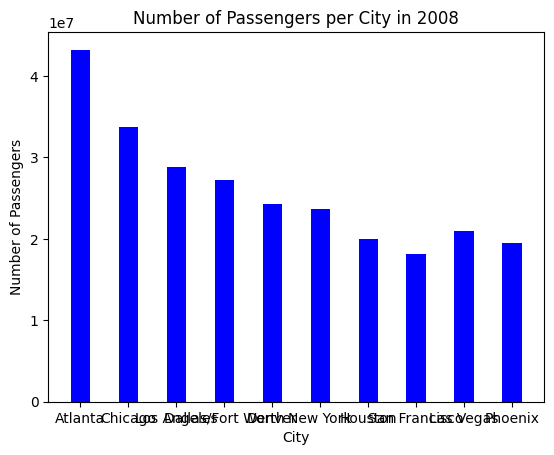

In [ ]:
import matplotlib.pyplot as plt

first_ten = [0,1,2,3,4,5,6,7,8,9]

cities_column = Busiest_Airports_df["city"]
year_2008_column = Busiest_Airports_df["2008"]

selected_city = []
selected_year = []

for city_id in first_ten:
    selected_city.append(cities_column[city_id])
    selected_year.append(year_2008_column[city_id])


# Now plot our bar graph
plt.bar(selected_city, selected_year, color ='blue', width = 0.4)

# Now add axis labels with units
plt.xlabel("City")
plt.ylabel("Number of Passengers")

# We can add a title too
plt.title("Number of Passengers per City in 2008")

Insights: From this bar chart we can see the distribution of the top 10 ranked cities and the amount of passengers they had in 2008. It is interesting that the graph is not in a complete positive skew because each city should be going down in rank and passengers, but towards the end the number of passengers seems to fluctuate with the ranked city. For example, Vegas seems to have more passengers than San Francisco, yet it is rated lower. There may be other variables unaccounted for that makes up the rating.

Created a boxplot of data from 2008

Text(0, 0.5, 'Number of Passengers Boarded in Top Rated Cities')

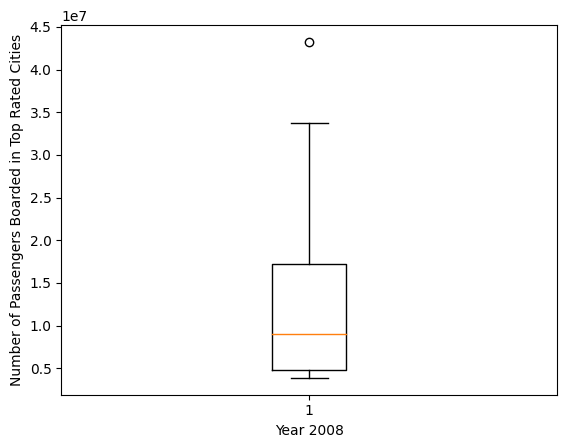

In [ ]:
year_2008 = Busiest_Airports_df["2008"]

plt.boxplot(year_2008)

plt.xlabel("Year 2008")
plt.ylabel("Number of Passengers Boarded in Top Rated Cities")

Insights: From the boxplot we can see the median number of passengers which was 12175570. We can also see there is one outlier, where one city had significantly more passengers than others. In 2008, there was a recession and it is interesting to see if any of the data in this year differs from other years due to less people possibly flying during this time.


Created ScatterPlot to see if higher passengers the year before leads to higher passenegrs the following year. Used the years 2005 and 2006.

Text(0.5, 1.0, 'Passengers in 2007-vs-Passengers in 2008 in the top 50 rated airports in the US')

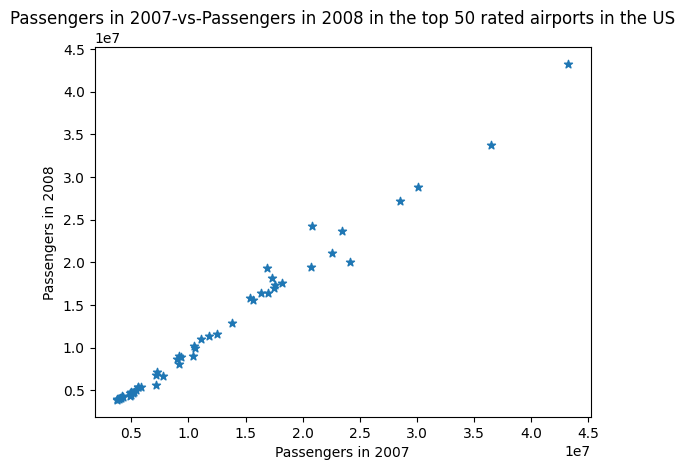

In [ ]:
year_2007_column = Busiest_Airports_df["2007"]
year_2008_column = Busiest_Airports_df["2008"]

plt.scatter(year_2007_column,year_2008_column, marker="*")

plt.xlabel("Passengers in 2007")
plt.ylabel("Passengers in 2008")

# We can add a title too
plt.title("Passengers in 2007-vs-Passengers in 2008 in the top 50 rated airports in the US")

calculated the pearson correlation coeffcient

In [ ]:
from scipy.stats import pearsonr

p = pearsonr(Busiest_Airports_df["2007"],Busiest_Airports_df["2008"])
print (p[0])

0.9930534734895781


Insights: Based on the scatter plot and the Pearson correlation coefficient calculated above (0.993), it seems that a higher number of passengers in an airport the previous year is related to a higher number of passengers in the following year. However, we cannot definitively conclude that higher passengers during the last year lead to more passengers in the following. There is likely confounding variables that affect the data.